In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#import sys  
#sys.path.append('**/Git/Serpents-n-Pythons/sir/')  
#from ODE_Function import * #scriptName without .py extension  

In [9]:
#import sys, os
#__file__ = 'ODE_Scripts.ipynb'
#sys.path.append(os.path.join(os.path.dirname(os.path.abspath(__file__)), '..', 'sir'))
#import ODE_Function

In [34]:
#Define derivative function
def f(t, SIR, c):
    dSIRdt = [-1 * c[0] * SIR[0] * SIR[1],# S dot
            c[0] * SIR[0] * SIR[1] - c[1] * SIR[1],# I dot 
            c[1] * SIR[1]] #R dot
    return dSIRdt

def p0(t, SIR): #Defining event to find max point
    ydot = c[0] * SIR[0] * SIR[1] - c[1] * SIR[1]
    return ydot

In [35]:
#Define time span, initial conditions, and constants
tspan = np.linspace(0, 300, 301) #Time period - 300 days (301 including 0)

SIR_init = [0.99999, 0.00001, 0] #Initial conditions - .001 % of population

b = .30 #Infection Rate
k = .20 #Removal Rate

c = [b, k] #Array of constants (referenced in derivative function)

print("The infection rate parameter is set as {}.".format(b))
print("The removal rate parameter is set as {}.".format(k))
print("The basic reproduction number is hence calculated as {}".format(b/k))

The infection rate parameter is set as 0.3.
The removal rate parameter is set as 0.2.
The basic reproduction number is hence calculated as 1.4999999999999998


In [36]:
#Solve differential equation
sol = solve_ivp(lambda t, SIR: f(t, SIR, c), \
                [tspan[0], tspan[-1]], SIR_init, t_eval=tspan, events=p0)

<function matplotlib.pyplot.show(close=None, block=None)>

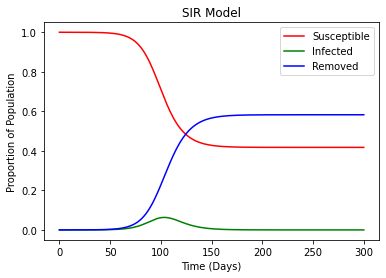

In [37]:
Susceptible = plt.plot(sol.t, sol.y[0], 'r', label='Susceptible')
Infected = plt.plot(sol.t, sol.y[1], 'g', label='Infected')
Removed = plt.plot(sol.t, sol.y[2], 'b', label='Removed')
plt.xlabel('Time (Days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model')
plt.legend()
plt.show

In [43]:
#Max Infection Results (Event Interpolation)
print("At it's max, the infected population constituted {}% of the total population."\
      .format(sol.y_events[0][0][1] * 100))
print("From the start, it took {} days to reach this maximum."\
      .format(sol.t_events[0][0]))

At it's max, the infected population constituted 6.324179432454466% of the total population.
From the start, it took 103.37198754267519 days to reach this maximum.


In [39]:
#Max Infection Results (Actual Plotted Points)
maxinfectionvalue = np.max(sol.y[1]) #Max infected value
maxinfectionpercent = maxinfectionvalue * 100 #Scales into a percentage of population
maxinfectionday = np.argmax(sol.y[1]) #Finds day # of this result

print("At it's max, the infected population constituted {}% of the total population."\
      .format(maxinfectionpercent) )
print("From the start, it took {} days to reach this maximum."\
      .format(sol.t[maxinfectionday]))

At it's max, the infected population constituted 6.3219581944167995% of the total population.
From the start, it took 103.0 days to reach this maximum.


In [17]:
#End of Pandemic Results
postpeak = sol.y[1,maxinfectionday:] #We will be looking at behavior after the peak

endtol = SIR_init[1] #Setting the end of the pandemic tolerance point as the original starting place.

peaktoend = np.argmax(postpeak < endtol) #Finds the post-peak day number of the first value under this tolerance
begintoend = maxinfectionday + peaktoend #Calculates total pandemic time frame
endremoved = sol.y[2,begintoend] * 100 #Returns removed % of population at end of pandemic

print("After the peak of infections, it took {} days to reach the end of the pandemic."\
      .format(peaktoend))
print("In total, the pandemic lasted {} days."\
      .format(begintoend))
print("In the process, {}% of the population had to be 'removed' (recovered or dead)."\
      .format(endremoved))

After the peak of infections, it took 134 days to reach the end of the pandemic.
In total, the pandemic lasted 237 days.
In the process, 58.2527796358952% of the population had to be 'removed' (recovered or dead).


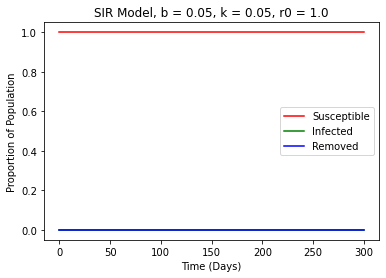

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 4.999998729167099e-05% of the population had to be 'removed' (recovered or dead).


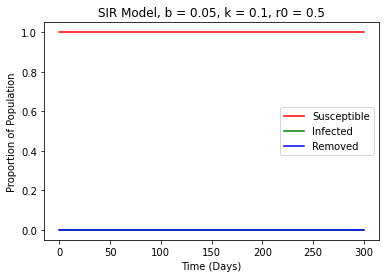

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 9.754123646577865e-05% of the population had to be 'removed' (recovered or dead).


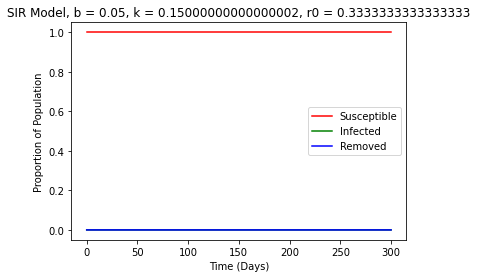

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00014274621776367693% of the population had to be 'removed' (recovered or dead).


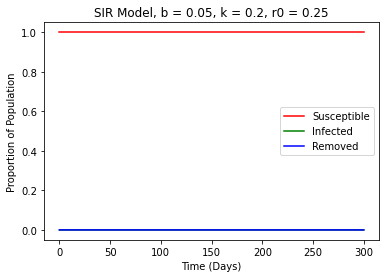

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00018573772561384538% of the population had to be 'removed' (recovered or dead).


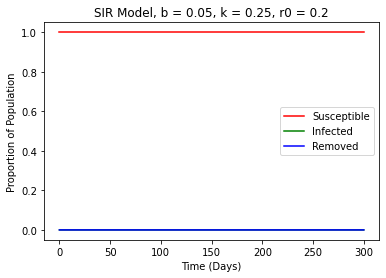

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00022664364858998717% of the population had to be 'removed' (recovered or dead).


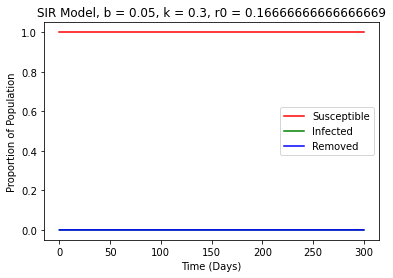

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.000265601862173257% of the population had to be 'removed' (recovered or dead).


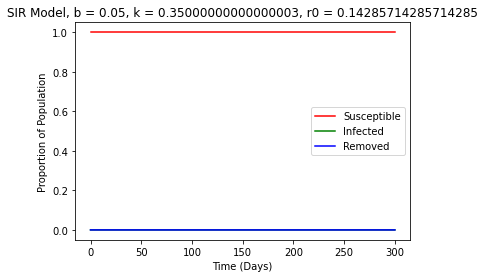

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003027652999777306% of the population had to be 'removed' (recovered or dead).


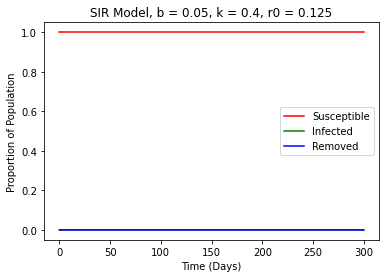

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003383071506886205% of the population had to be 'removed' (recovered or dead).


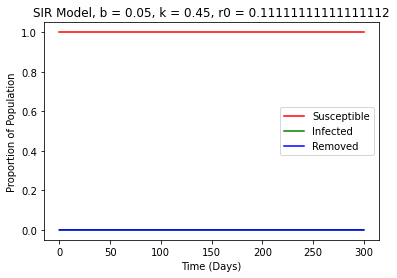

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003724261261089739% of the population had to be 'removed' (recovered or dead).


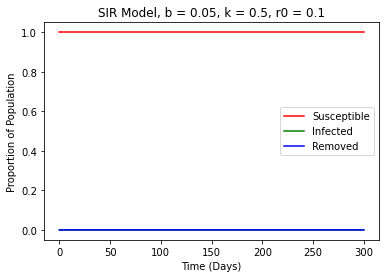

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004053517523599941% of the population had to be 'removed' (recovered or dead).


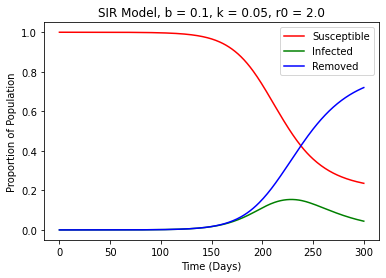

At it's max, the infected population constituted 15.400880715254178% of the total population.
From the start, it took 229.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 229 days.
In the process, 35.69949273332721% of the population had to be 'removed' (recovered or dead).


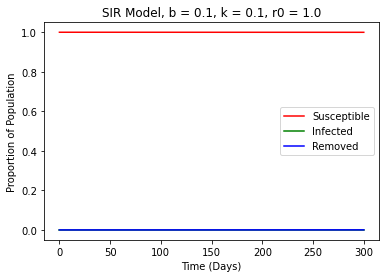

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 9.999994833336912e-05% of the population had to be 'removed' (recovered or dead).


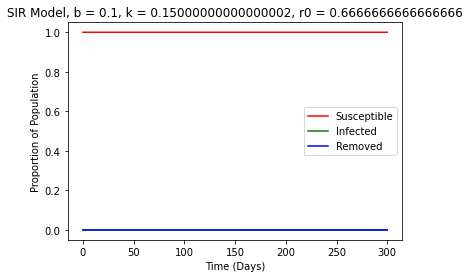

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00014631179063572306% of the population had to be 'removed' (recovered or dead).


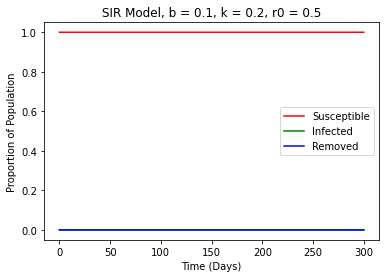

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00019032787648251063% of the population had to be 'removed' (recovered or dead).


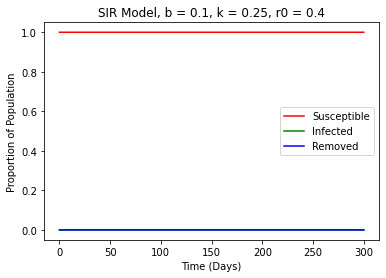

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0002321703896813921% of the population had to be 'removed' (recovered or dead).


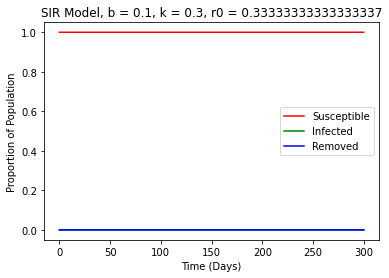

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.000271967152105586% of the population had to be 'removed' (recovered or dead).


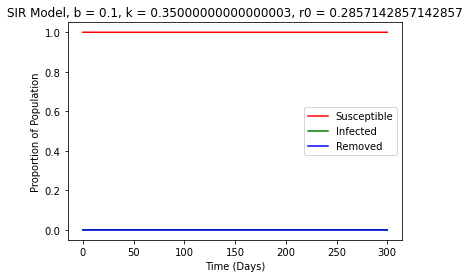

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00030985649866930063% of the population had to be 'removed' (recovered or dead).


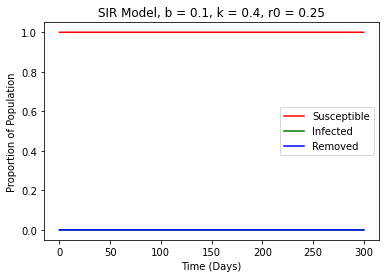

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00034599234149365545% of the population had to be 'removed' (recovered or dead).


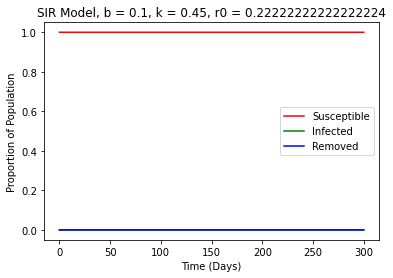

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003805493603068873% of the population had to be 'removed' (recovered or dead).


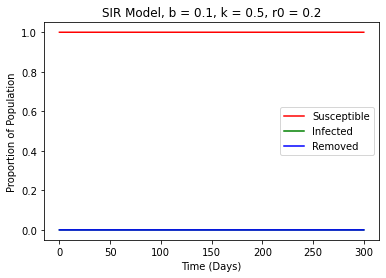

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004137282620777932% of the population had to be 'removed' (recovered or dead).


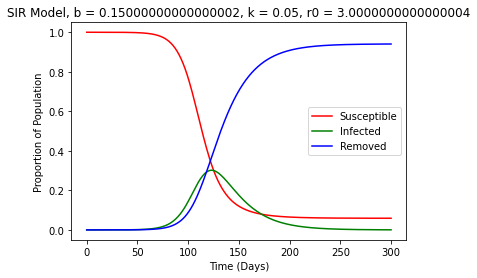

At it's max, the infected population constituted 30.187959719460057% of the total population.
From the start, it took 123.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 123 days.
In the process, 36.69110226378594% of the population had to be 'removed' (recovered or dead).


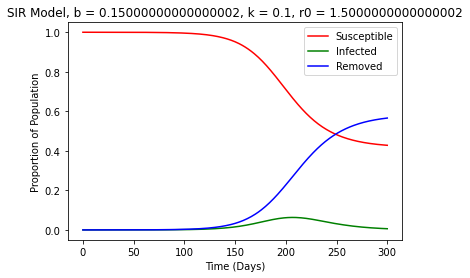

At it's max, the infected population constituted 6.3135274538180575% of the total population.
From the start, it took 207.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 207 days.
In the process, 27.163101643943143% of the population had to be 'removed' (recovered or dead).


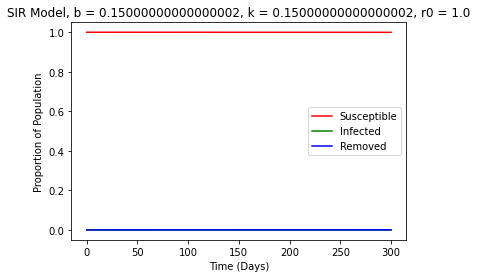

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00014999988187512533% of the population had to be 'removed' (recovered or dead).


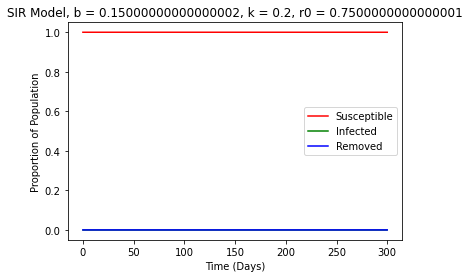

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00019508231065496124% of the population had to be 'removed' (recovered or dead).


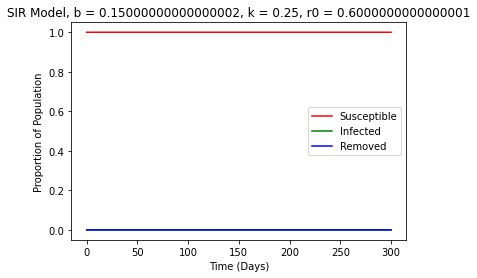

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0002379094178513608% of the population had to be 'removed' (recovered or dead).


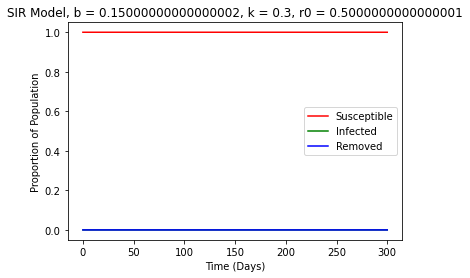

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0002786026471552122% of the population had to be 'removed' (recovered or dead).


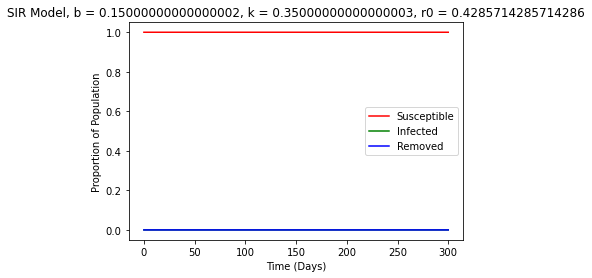

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00031728960348655343% of the population had to be 'removed' (recovered or dead).


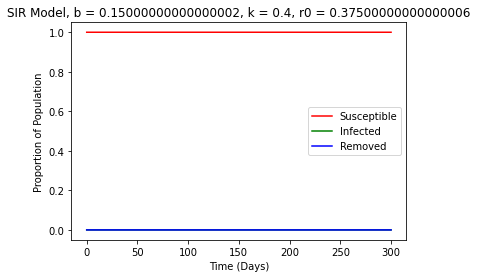

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00035410891910220976% of the population had to be 'removed' (recovered or dead).


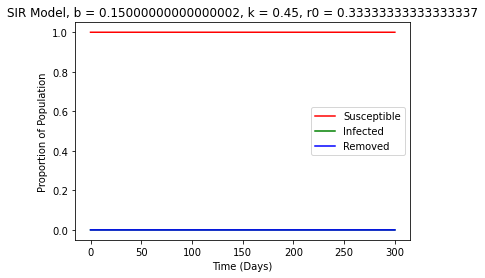

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00038921531246534786% of the population had to be 'removed' (recovered or dead).


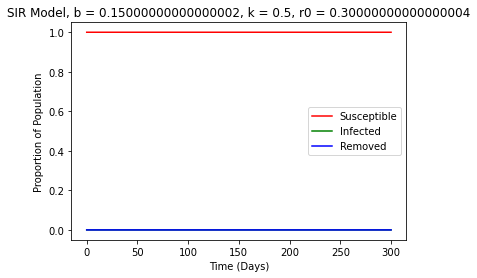

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004227847732393405% of the population had to be 'removed' (recovered or dead).


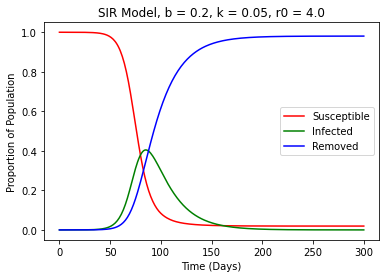

At it's max, the infected population constituted 40.46818505802459% of the total population.
From the start, it took 85.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 85 days.
In the process, 34.37728018323423% of the population had to be 'removed' (recovered or dead).


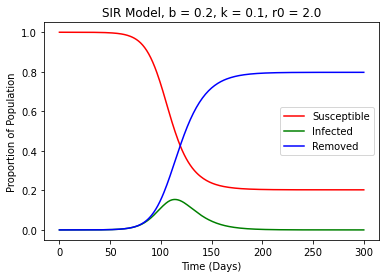

At it's max, the infected population constituted 15.408388008768759% of the total population.
From the start, it took 114.0 days to reach this maximum.
After the peak of infections, it took 180 days to reach the end of the pandemic.
In total, the pandemic lasted 294 days.
In the process, 79.72041826043133% of the population had to be 'removed' (recovered or dead).


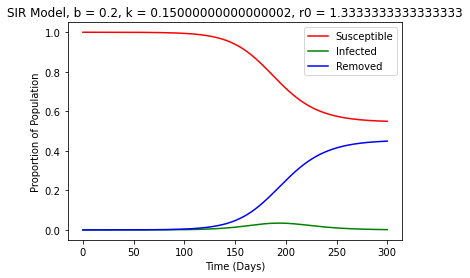

At it's max, the infected population constituted 3.4402829722091592% of the total population.
From the start, it took 193.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 193 days.
In the process, 21.429292323144423% of the population had to be 'removed' (recovered or dead).


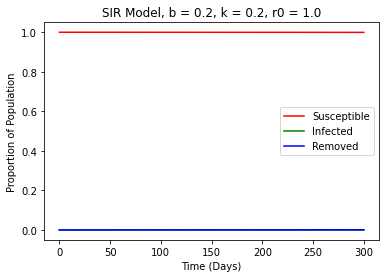

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0001999997866669749% of the population had to be 'removed' (recovered or dead).


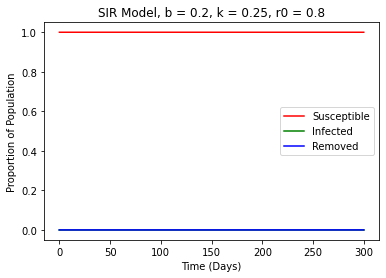

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00024385279818129053% of the population had to be 'removed' (recovered or dead).


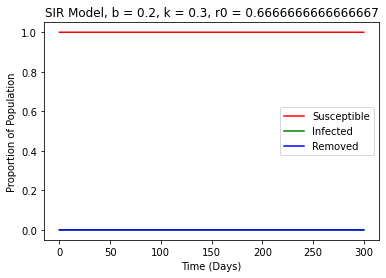

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00028549087068298345% of the population had to be 'removed' (recovered or dead).


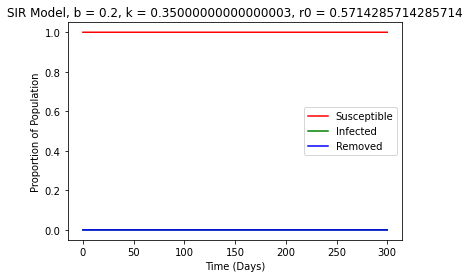

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003250346016868584% of the population had to be 'removed' (recovered or dead).


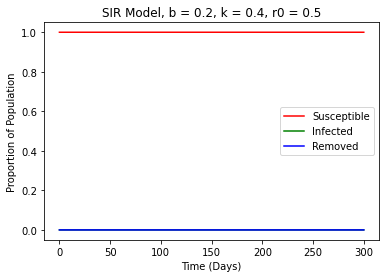

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00036261124183118706% of the population had to be 'removed' (recovered or dead).


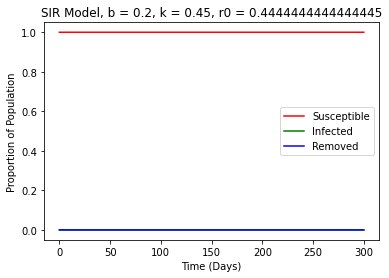

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00039835956626382716% of the population had to be 'removed' (recovered or dead).


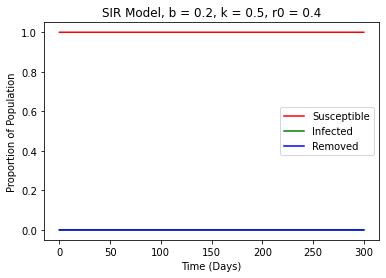

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004324349332245394% of the population had to be 'removed' (recovered or dead).


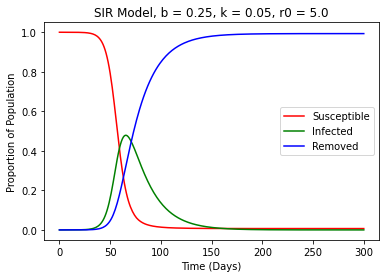

At it's max, the infected population constituted 47.866816879166926% of the total population.
From the start, it took 65.0 days to reach this maximum.
After the peak of infections, it took 234 days to reach the end of the pandemic.
In total, the pandemic lasted 299 days.
In the process, 99.31346441253127% of the population had to be 'removed' (recovered or dead).


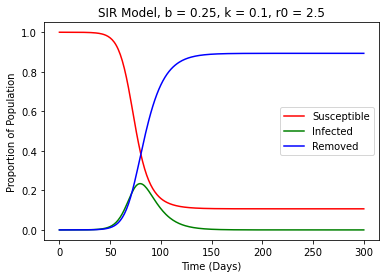

At it's max, the infected population constituted 23.40108564124418% of the total population.
From the start, it took 80.0 days to reach this maximum.
After the peak of infections, it took 149 days to reach the end of the pandemic.
In total, the pandemic lasted 229 days.
In the process, 89.32841150159312% of the population had to be 'removed' (recovered or dead).


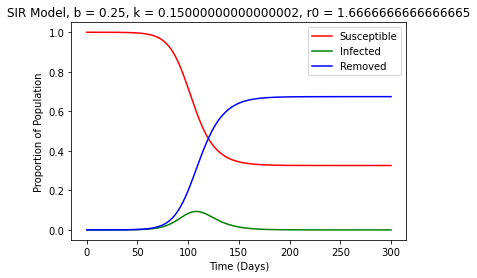

At it's max, the infected population constituted 9.350203377846539% of the total population.
From the start, it took 108.0 days to reach this maximum.
After the peak of infections, it took 150 days to reach the end of the pandemic.
In total, the pandemic lasted 258 days.
In the process, 67.41806753491962% of the population had to be 'removed' (recovered or dead).


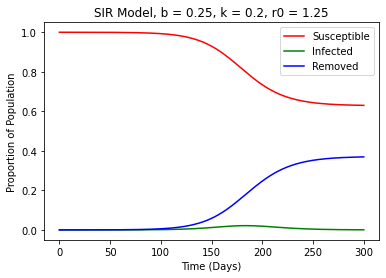

At it's max, the infected population constituted 2.1577553904690863% of the total population.
From the start, it took 184.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 184 days.
In the process, 18.122230026320977% of the population had to be 'removed' (recovered or dead).


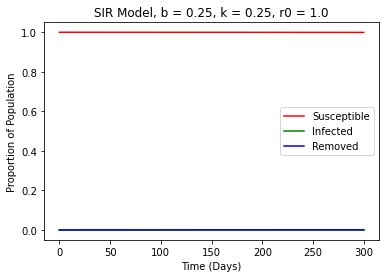

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0002499996614589578% of the population had to be 'removed' (recovered or dead).


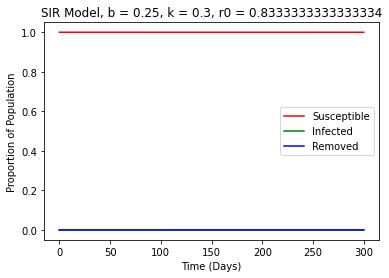

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00029262325344552893% of the population had to be 'removed' (recovered or dead).


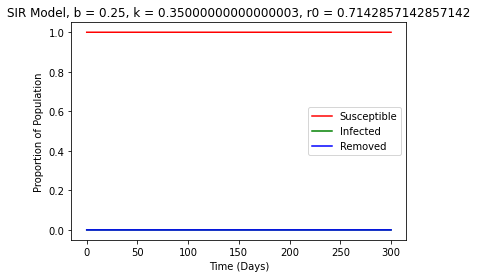

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003330722515702712% of the population had to be 'removed' (recovered or dead).


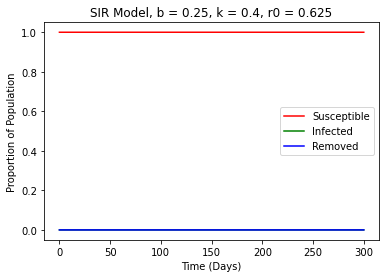

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00037146632234792644% of the population had to be 'removed' (recovered or dead).


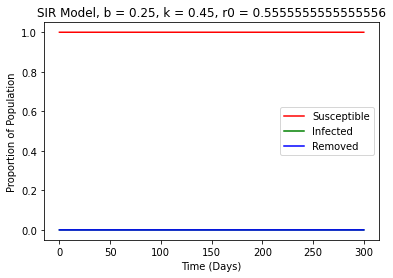

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004079322412250907% of the population had to be 'removed' (recovered or dead).


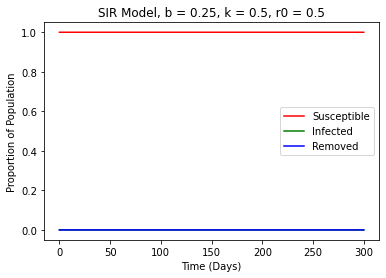

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004426087826716053% of the population had to be 'removed' (recovered or dead).


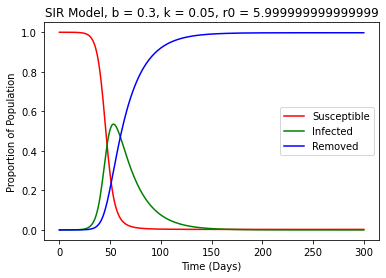

At it's max, the infected population constituted 53.518527716879284% of the total population.
From the start, it took 53.0 days to reach this maximum.
After the peak of infections, it took 230 days to reach the end of the pandemic.
In total, the pandemic lasted 283 days.
In the process, 99.74547801565757% of the population had to be 'removed' (recovered or dead).


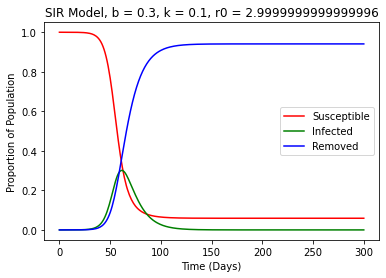

At it's max, the infected population constituted 30.084036979643496% of the total population.
From the start, it took 62.0 days to reach this maximum.
After the peak of infections, it took 135 days to reach the end of the pandemic.
In total, the pandemic lasted 197 days.
In the process, 94.09783048882193% of the population had to be 'removed' (recovered or dead).


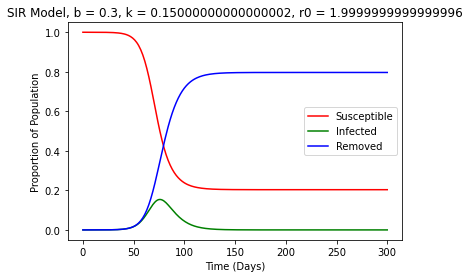

At it's max, the infected population constituted 15.402558294769083% of the total population.
From the start, it took 76.0 days to reach this maximum.
After the peak of infections, it took 120 days to reach the end of the pandemic.
In total, the pandemic lasted 196 days.
In the process, 79.65222087056846% of the population had to be 'removed' (recovered or dead).


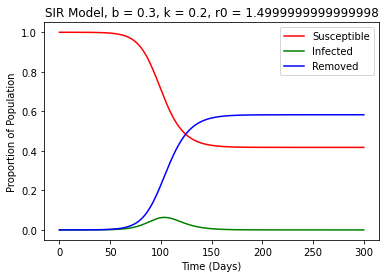

At it's max, the infected population constituted 6.3219581944167995% of the total population.
From the start, it took 103.0 days to reach this maximum.
After the peak of infections, it took 134 days to reach the end of the pandemic.
In total, the pandemic lasted 237 days.
In the process, 58.2527796358952% of the population had to be 'removed' (recovered or dead).


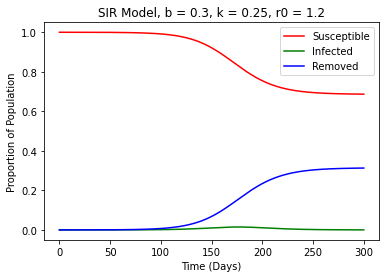

At it's max, the infected population constituted 1.4788737479818508% of the total population.
From the start, it took 175.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 175 days.
In the process, 15.05669499696311% of the population had to be 'removed' (recovered or dead).


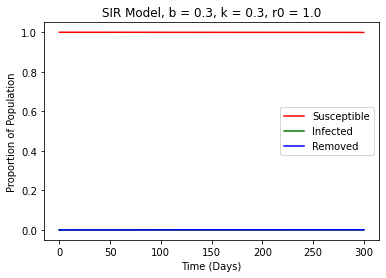

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.000299999505001119% of the population had to be 'removed' (recovered or dead).


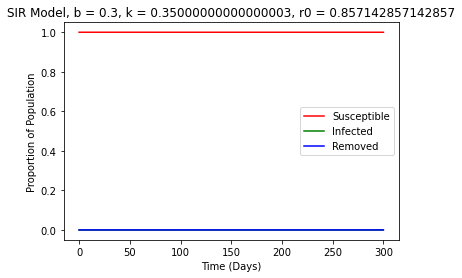

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00034139367606650286% of the population had to be 'removed' (recovered or dead).


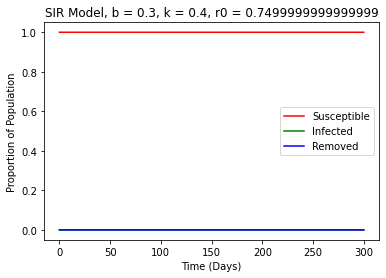

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00038065357046400037% of the population had to be 'removed' (recovered or dead).


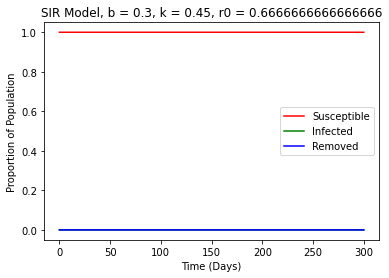

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00041789785586050185% of the population had to be 'removed' (recovered or dead).


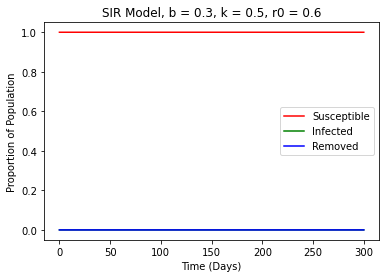

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00045325272835526766% of the population had to be 'removed' (recovered or dead).


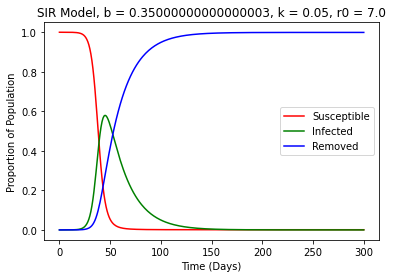

At it's max, the infected population constituted 57.967438716374396% of the total population.
From the start, it took 45.0 days to reach this maximum.
After the peak of infections, it took 228 days to reach the end of the pandemic.
In total, the pandemic lasted 273 days.
In the process, 99.9057496175317% of the population had to be 'removed' (recovered or dead).


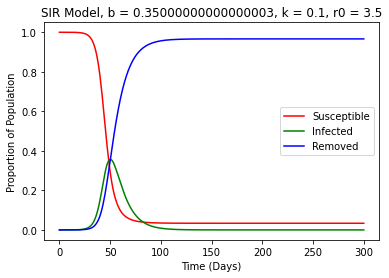

At it's max, the infected population constituted 35.688716327338646% of the total population.
From the start, it took 50.0 days to reach this maximum.
After the peak of infections, it took 127 days to reach the end of the pandemic.
In total, the pandemic lasted 177 days.
In the process, 96.63228017283751% of the population had to be 'removed' (recovered or dead).


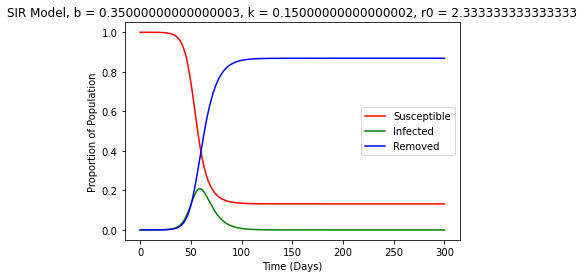

At it's max, the infected population constituted 20.890656075945106% of the total population.
From the start, it took 59.0 days to reach this maximum.
After the peak of infections, it took 105 days to reach the end of the pandemic.
In total, the pandemic lasted 164 days.
In the process, 86.84047587869563% of the population had to be 'removed' (recovered or dead).


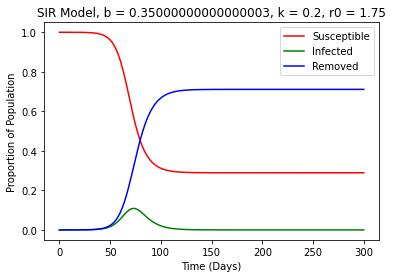

At it's max, the infected population constituted 10.881951089273112% of the total population.
From the start, it took 73.0 days to reach this maximum.
After the peak of infections, it took 106 days to reach the end of the pandemic.
In total, the pandemic lasted 179 days.
In the process, 71.09923172561841% of the population had to be 'removed' (recovered or dead).


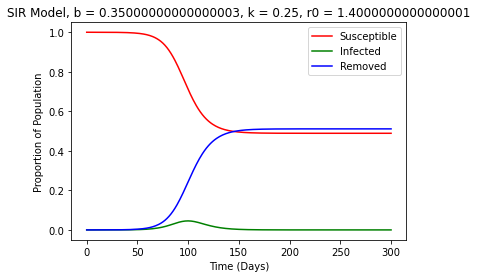

At it's max, the infected population constituted 4.559805009079381% of the total population.
From the start, it took 100.0 days to reach this maximum.
After the peak of infections, it took 123 days to reach the end of the pandemic.
In total, the pandemic lasted 223 days.
In the process, 51.11287782259506% of the population had to be 'removed' (recovered or dead).


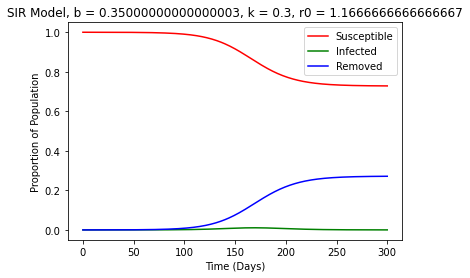

At it's max, the infected population constituted 1.0768273995534807% of the total population.
From the start, it took 169.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 169 days.
In the process, 13.30589984921827% of the population had to be 'removed' (recovered or dead).


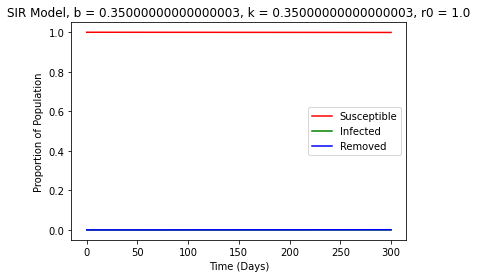

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00034999931604350824% of the population had to be 'removed' (recovered or dead).


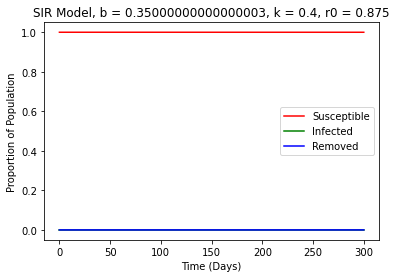

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003901640653603465% of the population had to be 'removed' (recovered or dead).


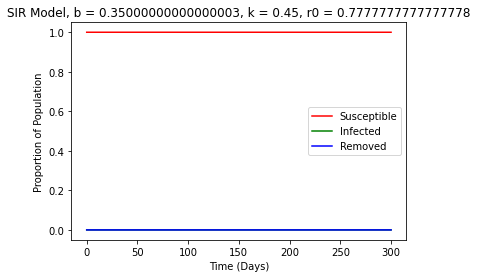

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00042823483354966407% of the population had to be 'removed' (recovered or dead).


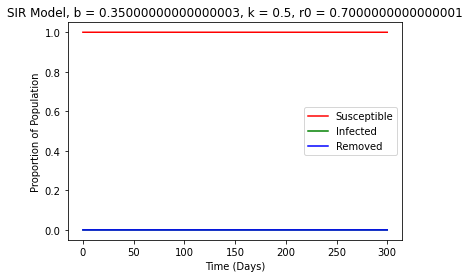

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00046432923460987724% of the population had to be 'removed' (recovered or dead).


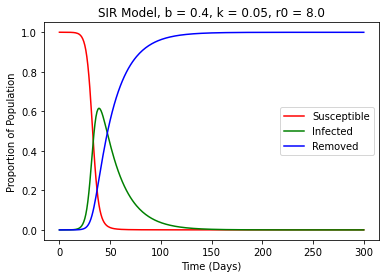

At it's max, the infected population constituted 61.55757558662264% of the total population.
From the start, it took 39.0 days to reach this maximum.
After the peak of infections, it took 227 days to reach the end of the pandemic.
In total, the pandemic lasted 266 days.
In the process, 99.9648565032159% of the population had to be 'removed' (recovered or dead).


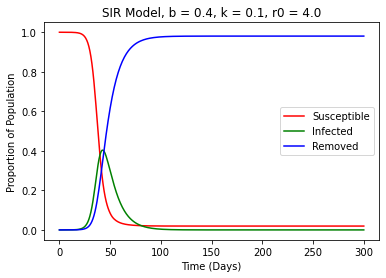

At it's max, the infected population constituted 40.346749975138955% of the total population.
From the start, it took 43.0 days to reach this maximum.
After the peak of infections, it took 122 days to reach the end of the pandemic.
In total, the pandemic lasted 165 days.
In the process, 98.0506977370946% of the population had to be 'removed' (recovered or dead).


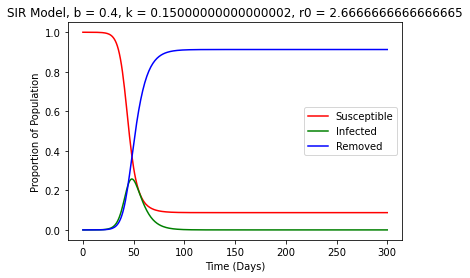

At it's max, the infected population constituted 25.763531881997604% of the total population.
From the start, it took 48.0 days to reach this maximum.
After the peak of infections, it took 96 days to reach the end of the pandemic.
In total, the pandemic lasted 144 days.
In the process, 91.2588336460013% of the population had to be 'removed' (recovered or dead).


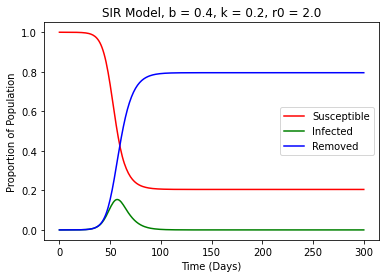

At it's max, the infected population constituted 15.38570352608951% of the total population.
From the start, it took 57.0 days to reach this maximum.
After the peak of infections, it took 91 days to reach the end of the pandemic.
In total, the pandemic lasted 148 days.
In the process, 79.52723289312318% of the population had to be 'removed' (recovered or dead).


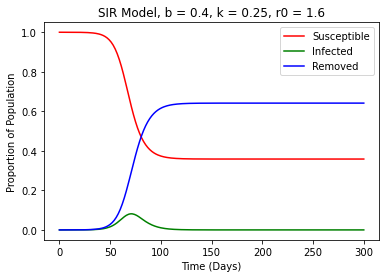

At it's max, the infected population constituted 8.149752405054052% of the total population.
From the start, it took 71.0 days to reach this maximum.
After the peak of infections, it took 95 days to reach the end of the pandemic.
In total, the pandemic lasted 166 days.
In the process, 64.1441531851868% of the population had to be 'removed' (recovered or dead).


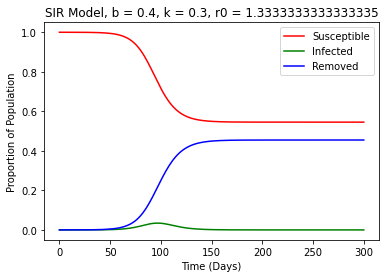

At it's max, the infected population constituted 3.4446589219627177% of the total population.
From the start, it took 97.0 days to reach this maximum.
After the peak of infections, it took 115 days to reach the end of the pandemic.
In total, the pandemic lasted 212 days.
In the process, 45.47537024884322% of the population had to be 'removed' (recovered or dead).


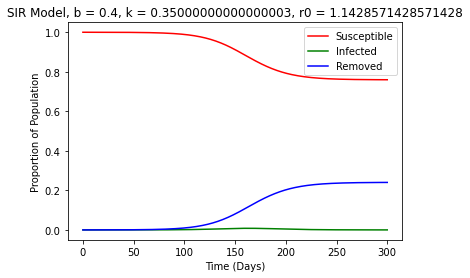

At it's max, the infected population constituted 0.8198499496986413% of the total population.
From the start, it took 162.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 162 days.
In the process, 11.392218540653928% of the population had to be 'removed' (recovered or dead).


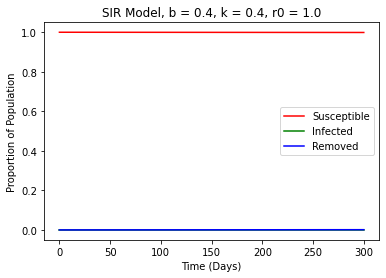

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0003999990933361804% of the population had to be 'removed' (recovered or dead).


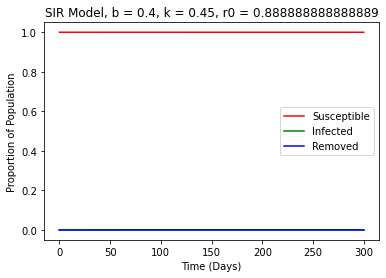

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00043893442047626707% of the population had to be 'removed' (recovered or dead).


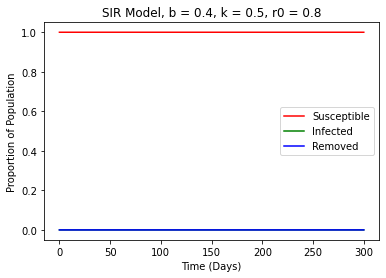

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00047581604475964667% of the population had to be 'removed' (recovered or dead).


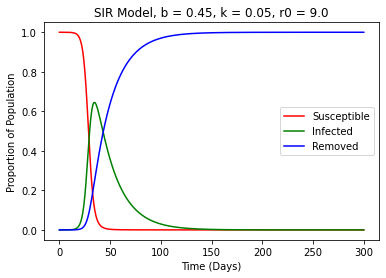

At it's max, the infected population constituted 64.42666201045068% of the total population.
From the start, it took 35.0 days to reach this maximum.
After the peak of infections, it took 226 days to reach the end of the pandemic.
In total, the pandemic lasted 261 days.
In the process, 99.98632119512403% of the population had to be 'removed' (recovered or dead).


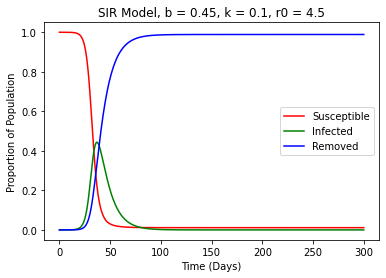

At it's max, the infected population constituted 44.402216732884774% of the total population.
From the start, it took 37.0 days to reach this maximum.
After the peak of infections, it took 119 days to reach the end of the pandemic.
In total, the pandemic lasted 156 days.
In the process, 98.86233951479655% of the population had to be 'removed' (recovered or dead).


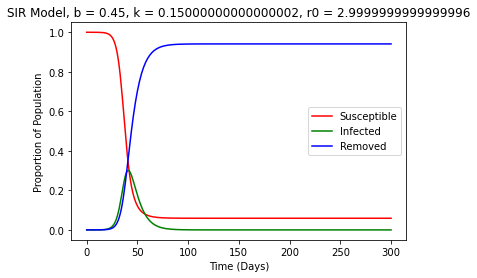

At it's max, the infected population constituted 30.097939909181825% of the total population.
From the start, it took 41.0 days to reach this maximum.
After the peak of infections, it took 91 days to reach the end of the pandemic.
In total, the pandemic lasted 132 days.
In the process, 94.0950154757382% of the population had to be 'removed' (recovered or dead).


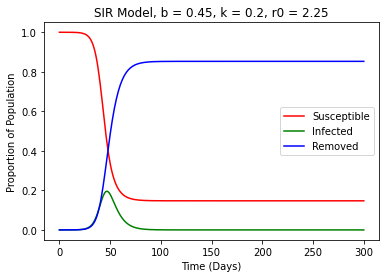

At it's max, the infected population constituted 19.55531585736613% of the total population.
From the start, it took 47.0 days to reach this maximum.
After the peak of infections, it took 81 days to reach the end of the pandemic.
In total, the pandemic lasted 128 days.
In the process, 85.27532027644041% of the population had to be 'removed' (recovered or dead).


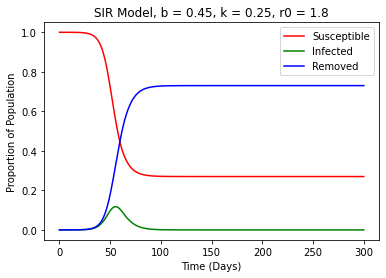

At it's max, the infected population constituted 11.765699303117499% of the total population.
From the start, it took 55.0 days to reach this maximum.
After the peak of infections, it took 82 days to reach the end of the pandemic.
In total, the pandemic lasted 137 days.
In the process, 72.99799644519555% of the population had to be 'removed' (recovered or dead).


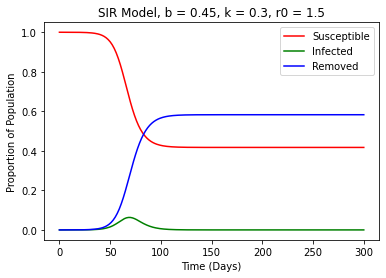

At it's max, the infected population constituted 6.328615651397296% of the total population.
From the start, it took 69.0 days to reach this maximum.
After the peak of infections, it took 89 days to reach the end of the pandemic.
In total, the pandemic lasted 158 days.
In the process, 58.26980284063077% of the population had to be 'removed' (recovered or dead).


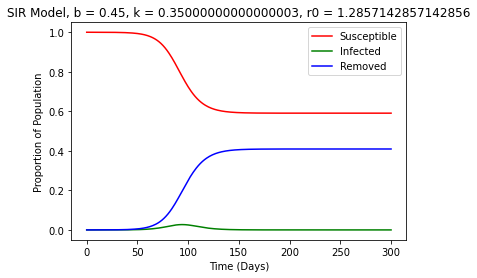

At it's max, the infected population constituted 2.695303884874513% of the total population.
From the start, it took 94.0 days to reach this maximum.
After the peak of infections, it took 109 days to reach the end of the pandemic.
In total, the pandemic lasted 203 days.
In the process, 40.93393381674634% of the population had to be 'removed' (recovered or dead).


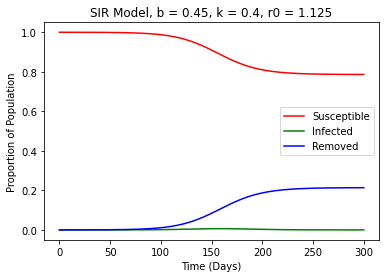

At it's max, the infected population constituted 0.6456735611289698% of the total population.
From the start, it took 158.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 158 days.
In the process, 10.463491836120548% of the population had to be 'removed' (recovered or dead).


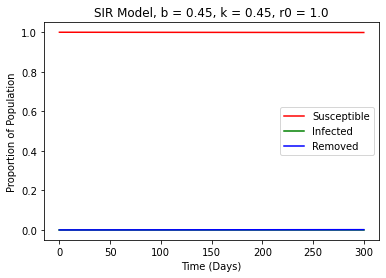

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00044999883562919595% of the population had to be 'removed' (recovered or dead).


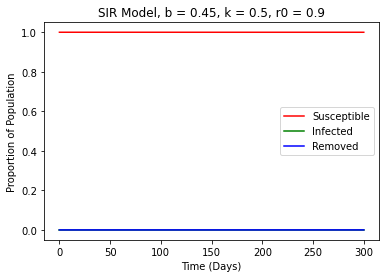

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.00048770474046359603% of the population had to be 'removed' (recovered or dead).


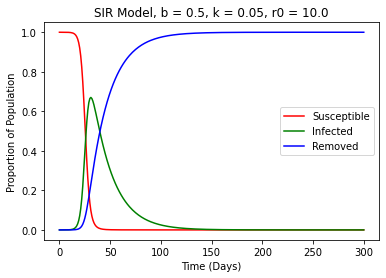

At it's max, the infected population constituted 67.01662639164796% of the total population.
From the start, it took 31.0 days to reach this maximum.
After the peak of infections, it took 226 days to reach the end of the pandemic.
In total, the pandemic lasted 257 days.
In the process, 99.99431558231593% of the population had to be 'removed' (recovered or dead).


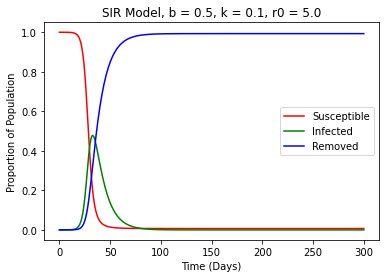

At it's max, the infected population constituted 47.80672889179443% of the total population.
From the start, it took 33.0 days to reach this maximum.
After the peak of infections, it took 117 days to reach the end of the pandemic.
In total, the pandemic lasted 150 days.
In the process, 99.30101244789394% of the population had to be 'removed' (recovered or dead).


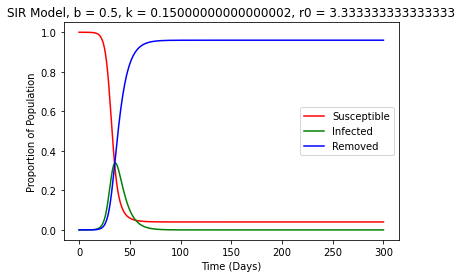

At it's max, the infected population constituted 33.87150167228199% of the total population.
From the start, it took 36.0 days to reach this maximum.
After the peak of infections, it took 86 days to reach the end of the pandemic.
In total, the pandemic lasted 122 days.
In the process, 95.97400294375669% of the population had to be 'removed' (recovered or dead).


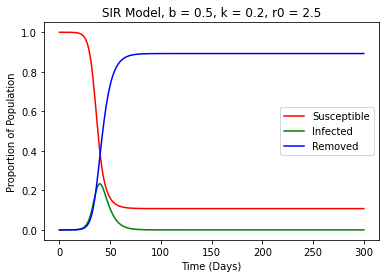

At it's max, the infected population constituted 23.38046245886601% of the total population.
From the start, it took 40.0 days to reach this maximum.
After the peak of infections, it took 75 days to reach the end of the pandemic.
In total, the pandemic lasted 115 days.
In the process, 89.22756555178924% of the population had to be 'removed' (recovered or dead).


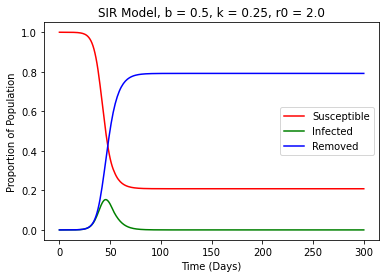

At it's max, the infected population constituted 15.325958618604329% of the total population.
From the start, it took 46.0 days to reach this maximum.
After the peak of infections, it took 73 days to reach the end of the pandemic.
In total, the pandemic lasted 119 days.
In the process, 79.17333778855357% of the population had to be 'removed' (recovered or dead).


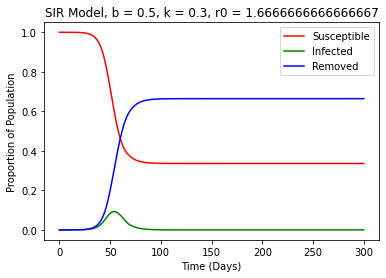

At it's max, the infected population constituted 9.30424059729688% of the total population.
From the start, it took 54.0 days to reach this maximum.
After the peak of infections, it took 77 days to reach the end of the pandemic.
In total, the pandemic lasted 131 days.
In the process, 66.39856112254377% of the population had to be 'removed' (recovered or dead).


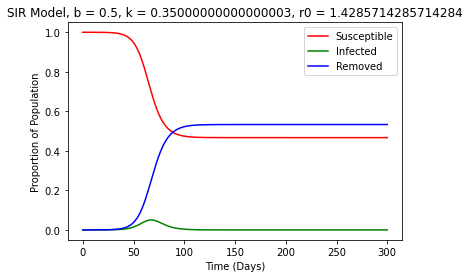

At it's max, the infected population constituted 5.056371063017524% of the total population.
From the start, it took 67.0 days to reach this maximum.
After the peak of infections, it took 84 days to reach the end of the pandemic.
In total, the pandemic lasted 151 days.
In the process, 53.314866484559% of the population had to be 'removed' (recovered or dead).


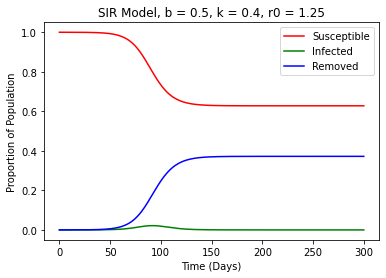

At it's max, the infected population constituted 2.166128647101938% of the total population.
From the start, it took 92.0 days to reach this maximum.
After the peak of infections, it took 104 days to reach the end of the pandemic.
In total, the pandemic lasted 196 days.
In the process, 37.21089252933073% of the population had to be 'removed' (recovered or dead).


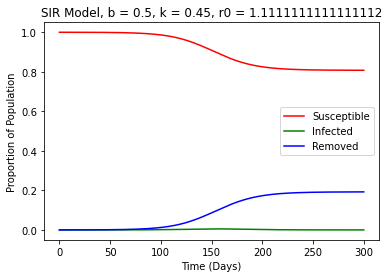

At it's max, the infected population constituted 0.5151484737122264% of the total population.
From the start, it took 153.0 days to reach this maximum.
After the peak of infections, it took 0 days to reach the end of the pandemic.
In total, the pandemic lasted 153 days.
In the process, 9.333535098241144% of the population had to be 'removed' (recovered or dead).


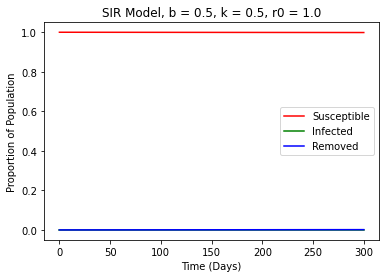

At it's max, the infected population constituted 0.001% of the total population.
From the start, it took 0.0 days to reach this maximum.
After the peak of infections, it took 1 days to reach the end of the pandemic.
In total, the pandemic lasted 1 days.
In the process, 0.0004999985416726201% of the population had to be 'removed' (recovered or dead).


In [51]:
#Define time span, initial conditions, and constants
tspan = np.linspace(0, 300, 301) #Time period - 300 days (301 including 0)

SIR_init = [0.99999, 0.00001, 0] #Initial conditions - .001 % of population

brange = np.arange(.05, .55, .05) #infection rates
krange = np.arange(.05, .55, .05) #removal rates

for b in brange:
    for k in krange:
        c = [b, k]
        r0 = b/k
        
        #Solve differential equation
        sol = solve_ivp(lambda t, SIR: f(t, SIR, c), \
                        [tspan[0], tspan[-1]], SIR_init, t_eval=tspan, events=p0)
        
        figname = 'figure' + str(b) + "_" + str(k)
        plt.plot(sol.t, sol.y[0], 'r', label='Susceptible')
        plt.plot(sol.t, sol.y[1], 'g', label='Infected')
        plt.plot(sol.t, sol.y[2], 'b', label='Removed')
        plt.xlabel('Time (Days)')
        plt.ylabel('Proportion of Population')
        plt.title('SIR Model, b = {}, k = {}, r0 = {}'.format(b, k, r0))
        plt.legend()
        plt.show()
        

        #Max Infection Results (Actual Plotted Points)
        maxinfectionvalue = np.max(sol.y[1]) #Max infected value
        maxinfectionpercent = maxinfectionvalue * 100 #Scales into a percentage of population
        maxinfectionday = np.argmax(sol.y[1]) #Finds day # of this result

        print("At it's max, the infected population constituted {}% of the total population."\
              .format(maxinfectionpercent) )
        print("From the start, it took {} days to reach this maximum."\
              .format(sol.t[maxinfectionday]))
        
        #End of Pandemic Results
        postpeak = sol.y[1,maxinfectionday:] #We will be looking at behavior after the peak

        endtol = SIR_init[1] #Setting the end of the pandemic tolerance point as the original starting place.

        peaktoend = np.argmax(postpeak < endtol) #Finds the post-peak day number of the first value under this tolerance
        begintoend = maxinfectionday + peaktoend #Calculates total pandemic time frame
        endremoved = sol.y[2,begintoend] * 100 #Returns removed % of population at end of pandemic

        print("After the peak of infections, it took {} days to reach the end of the pandemic."\
              .format(peaktoend))
        print("In total, the pandemic lasted {} days."\
              .format(begintoend))
        print("In the process, {}% of the population had to be 'removed' (recovered or dead)."\
              .format(endremoved))
plt.show()      

In [50]:
plt.show()